In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data into dataframe

data = pd.read_csv("C:\\Users\\spurt\\Downloads\\Phishing-URL-Detection-master\\Phishing-URL-Detection-master\\phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [7]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [8]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [9]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [10]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [11]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [12]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [13]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [14]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [15]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)



In [17]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [18]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [19]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



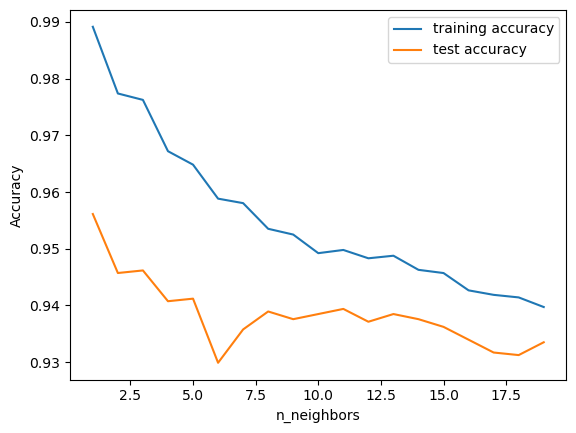

In [20]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [21]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [22]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [23]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [24]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [25]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [26]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [27]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [28]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [29]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [30]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [31]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [32]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [33]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.957

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.962

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.959

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.965


In [34]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



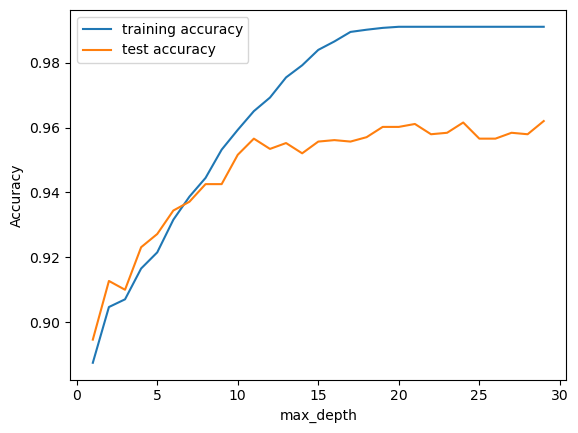

In [35]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [36]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [37]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [38]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [39]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.968

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.973

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.965


In [40]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



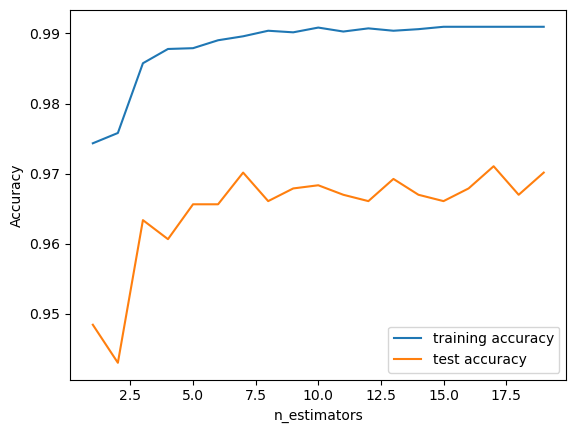

In [41]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [42]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [43]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [44]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [45]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [46]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



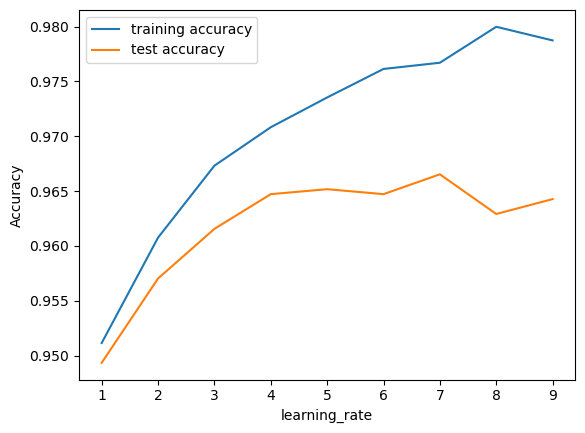

In [47]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

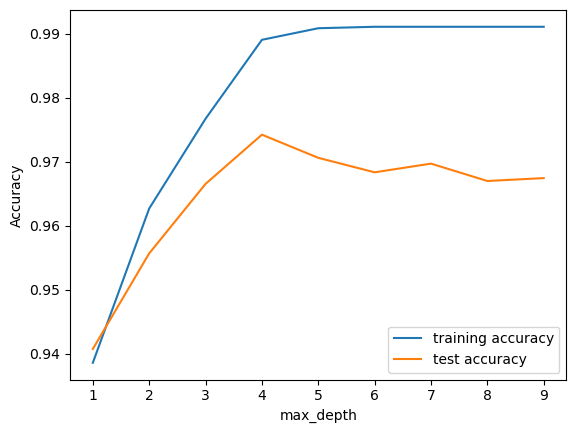

In [48]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [51]:
!pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/101.0 MB 8.9 MB/s eta 0:00:12
    --------------------------------------- 1.6/101.0 MB 16.6 MB/s eta 0:00:07
   - -------------------------------------- 2.5/101.0 MB 18.0 MB/s eta 0:00:06
   - -------------------------------------- 3.4/101.0 MB 18.3 MB/s eta 0:00:06
   - -------------------------------------- 4.3/101.0 MB 18.3 MB/s eta 0:00:06
   -- ------------------------------------- 5.2/101.0 MB 18.3 MB/s eta 0:00:06
   -- ------------------------------------- 6.0/101.0 MB 18.4 MB/s eta 0:00:06
   -- ---------

In [52]:
# CatBoost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate=0.1)

# fit the model
cat.fit(X_train, y_train)

0:	learn: 0.5487232	total: 139ms	remaining: 2m 18s
1:	learn: 0.4349357	total: 143ms	remaining: 1m 11s
2:	learn: 0.3609236	total: 146ms	remaining: 48.6s
3:	learn: 0.3050829	total: 150ms	remaining: 37.3s
4:	learn: 0.2766620	total: 155ms	remaining: 30.7s
5:	learn: 0.2475476	total: 159ms	remaining: 26.4s
6:	learn: 0.2286637	total: 164ms	remaining: 23.2s
7:	learn: 0.2138754	total: 167ms	remaining: 20.7s
8:	learn: 0.2013643	total: 171ms	remaining: 18.8s
9:	learn: 0.1896378	total: 174ms	remaining: 17.3s
10:	learn: 0.1819539	total: 178ms	remaining: 16s
11:	learn: 0.1767867	total: 182ms	remaining: 14.9s
12:	learn: 0.1727735	total: 185ms	remaining: 14.1s
13:	learn: 0.1682578	total: 189ms	remaining: 13.3s
14:	learn: 0.1641759	total: 193ms	remaining: 12.7s
15:	learn: 0.1614218	total: 197ms	remaining: 12.1s
16:	learn: 0.1558968	total: 201ms	remaining: 11.6s
17:	learn: 0.1535881	total: 204ms	remaining: 11.1s
18:	learn: 0.1514228	total: 208ms	remaining: 10.7s
19:	learn: 0.1482580	total: 212ms	remaini

206:	learn: 0.0482768	total: 947ms	remaining: 3.63s
207:	learn: 0.0481178	total: 952ms	remaining: 3.62s
208:	learn: 0.0479317	total: 955ms	remaining: 3.62s
209:	learn: 0.0476658	total: 959ms	remaining: 3.61s
210:	learn: 0.0474069	total: 963ms	remaining: 3.6s
211:	learn: 0.0471817	total: 967ms	remaining: 3.6s
212:	learn: 0.0470479	total: 972ms	remaining: 3.59s
213:	learn: 0.0469487	total: 976ms	remaining: 3.58s
214:	learn: 0.0468552	total: 981ms	remaining: 3.58s
215:	learn: 0.0466651	total: 985ms	remaining: 3.58s
216:	learn: 0.0465418	total: 989ms	remaining: 3.57s
217:	learn: 0.0464800	total: 993ms	remaining: 3.56s
218:	learn: 0.0463546	total: 998ms	remaining: 3.56s
219:	learn: 0.0461314	total: 1s	remaining: 3.55s
220:	learn: 0.0460039	total: 1s	remaining: 3.54s
221:	learn: 0.0458286	total: 1.01s	remaining: 3.54s
222:	learn: 0.0456749	total: 1.01s	remaining: 3.53s
223:	learn: 0.0455866	total: 1.02s	remaining: 3.52s
224:	learn: 0.0453525	total: 1.02s	remaining: 3.52s
225:	learn: 0.045216

410:	learn: 0.0317538	total: 1.75s	remaining: 2.51s
411:	learn: 0.0316677	total: 1.75s	remaining: 2.5s
412:	learn: 0.0316340	total: 1.76s	remaining: 2.5s
413:	learn: 0.0316212	total: 1.76s	remaining: 2.49s
414:	learn: 0.0315865	total: 1.76s	remaining: 2.49s
415:	learn: 0.0315026	total: 1.77s	remaining: 2.48s
416:	learn: 0.0314715	total: 1.77s	remaining: 2.48s
417:	learn: 0.0314461	total: 1.78s	remaining: 2.48s
418:	learn: 0.0313943	total: 1.78s	remaining: 2.47s
419:	learn: 0.0313461	total: 1.79s	remaining: 2.47s
420:	learn: 0.0313159	total: 1.79s	remaining: 2.46s
421:	learn: 0.0312338	total: 1.79s	remaining: 2.46s
422:	learn: 0.0311835	total: 1.8s	remaining: 2.46s
423:	learn: 0.0311514	total: 1.8s	remaining: 2.45s
424:	learn: 0.0311268	total: 1.81s	remaining: 2.44s
425:	learn: 0.0310930	total: 1.81s	remaining: 2.44s
426:	learn: 0.0310731	total: 1.81s	remaining: 2.44s
427:	learn: 0.0310464	total: 1.82s	remaining: 2.43s
428:	learn: 0.0310290	total: 1.82s	remaining: 2.43s
429:	learn: 0.03

610:	learn: 0.0264234	total: 2.54s	remaining: 1.62s
611:	learn: 0.0264233	total: 2.54s	remaining: 1.61s
612:	learn: 0.0264233	total: 2.54s	remaining: 1.61s
613:	learn: 0.0264210	total: 2.55s	remaining: 1.6s
614:	learn: 0.0264003	total: 2.55s	remaining: 1.6s
615:	learn: 0.0264003	total: 2.56s	remaining: 1.59s
616:	learn: 0.0263794	total: 2.56s	remaining: 1.59s
617:	learn: 0.0263627	total: 2.56s	remaining: 1.58s
618:	learn: 0.0263594	total: 2.57s	remaining: 1.58s
619:	learn: 0.0263505	total: 2.57s	remaining: 1.58s
620:	learn: 0.0263275	total: 2.58s	remaining: 1.57s
621:	learn: 0.0263104	total: 2.58s	remaining: 1.57s
622:	learn: 0.0262977	total: 2.58s	remaining: 1.56s
623:	learn: 0.0262934	total: 2.59s	remaining: 1.56s
624:	learn: 0.0262811	total: 2.59s	remaining: 1.55s
625:	learn: 0.0262811	total: 2.59s	remaining: 1.55s
626:	learn: 0.0262506	total: 2.6s	remaining: 1.54s
627:	learn: 0.0262506	total: 2.6s	remaining: 1.54s
628:	learn: 0.0262506	total: 2.6s	remaining: 1.54s
629:	learn: 0.026

772:	learn: 0.0249374	total: 3.13s	remaining: 921ms
773:	learn: 0.0249374	total: 3.14s	remaining: 917ms
774:	learn: 0.0249343	total: 3.14s	remaining: 912ms
775:	learn: 0.0249343	total: 3.15s	remaining: 908ms
776:	learn: 0.0249343	total: 3.15s	remaining: 904ms
777:	learn: 0.0249343	total: 3.15s	remaining: 899ms
778:	learn: 0.0249341	total: 3.15s	remaining: 895ms
779:	learn: 0.0249233	total: 3.16s	remaining: 891ms
780:	learn: 0.0249233	total: 3.16s	remaining: 887ms
781:	learn: 0.0249232	total: 3.17s	remaining: 883ms
782:	learn: 0.0249232	total: 3.17s	remaining: 879ms
783:	learn: 0.0249231	total: 3.17s	remaining: 874ms
784:	learn: 0.0249231	total: 3.18s	remaining: 870ms
785:	learn: 0.0249232	total: 3.18s	remaining: 866ms
786:	learn: 0.0249231	total: 3.18s	remaining: 862ms
787:	learn: 0.0249231	total: 3.19s	remaining: 857ms
788:	learn: 0.0249230	total: 3.19s	remaining: 853ms
789:	learn: 0.0249230	total: 3.19s	remaining: 849ms
790:	learn: 0.0249230	total: 3.2s	remaining: 845ms
791:	learn: 0

950:	learn: 0.0246896	total: 3.75s	remaining: 193ms
951:	learn: 0.0246895	total: 3.75s	remaining: 189ms
952:	learn: 0.0246895	total: 3.76s	remaining: 185ms
953:	learn: 0.0246894	total: 3.76s	remaining: 181ms
954:	learn: 0.0246894	total: 3.76s	remaining: 177ms
955:	learn: 0.0246894	total: 3.77s	remaining: 173ms
956:	learn: 0.0246893	total: 3.77s	remaining: 169ms
957:	learn: 0.0246893	total: 3.77s	remaining: 165ms
958:	learn: 0.0246893	total: 3.78s	remaining: 162ms
959:	learn: 0.0246893	total: 3.78s	remaining: 158ms
960:	learn: 0.0246892	total: 3.78s	remaining: 154ms
961:	learn: 0.0246892	total: 3.79s	remaining: 150ms
962:	learn: 0.0246892	total: 3.79s	remaining: 146ms
963:	learn: 0.0246891	total: 3.79s	remaining: 142ms
964:	learn: 0.0246891	total: 3.8s	remaining: 138ms
965:	learn: 0.0246891	total: 3.8s	remaining: 134ms
966:	learn: 0.0246891	total: 3.8s	remaining: 130ms
967:	learn: 0.0246890	total: 3.81s	remaining: 126ms
968:	learn: 0.0246890	total: 3.81s	remaining: 122ms
969:	learn: 0.0

In [53]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [54]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [55]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [56]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 1.87ms	remaining: 1.87s
1:	learn: 0.4349357	total: 4.46ms	remaining: 2.22s
2:	learn: 0.3609236	total: 8.36ms	remaining: 2.78s
3:	learn: 0.3050829	total: 11.8ms	remaining: 2.95s
4:	learn: 0.2766620	total: 15.5ms	remaining: 3.08s
5:	learn: 0.2475476	total: 19ms	remaining: 3.15s
6:	learn: 0.2286637	total: 22.6ms	remaining: 3.21s
7:	learn: 0.2138754	total: 27.2ms	remaining: 3.38s
8:	learn: 0.2013643	total: 31.1ms	remaining: 3.43s
9:	learn: 0.1896378	total: 34.9ms	remaining: 3.46s
10:	learn: 0.1819539	total: 38.7ms	remaining: 3.48s
11:	learn: 0.1767867	total: 42.3ms	remaining: 3.49s
12:	learn: 0.1727735	total: 45.9ms	remaining: 3.48s
13:	learn: 0.1682578	total: 49.5ms	remaining: 3.49s
14:	learn: 0.1641759	total: 53.3ms	remaining: 3.5s
15:	learn: 0.1614218	total: 57.5ms	remaining: 3.54s
16:	learn: 0.1558968	total: 61.2ms	remaining: 3.54s
17:	learn: 0.1535881	total: 64.9ms	remaining: 3.54s
18:	learn: 0.1514228	total: 68.5ms	remaining: 3.54s
19:	learn: 0.1482580	tota

161:	learn: 0.0560566	total: 604ms	remaining: 3.12s
162:	learn: 0.0558560	total: 608ms	remaining: 3.12s
163:	learn: 0.0554512	total: 611ms	remaining: 3.12s
164:	learn: 0.0552806	total: 615ms	remaining: 3.11s
165:	learn: 0.0550538	total: 619ms	remaining: 3.11s
166:	learn: 0.0548825	total: 623ms	remaining: 3.1s
167:	learn: 0.0547805	total: 626ms	remaining: 3.1s
168:	learn: 0.0546642	total: 632ms	remaining: 3.11s
169:	learn: 0.0543574	total: 636ms	remaining: 3.11s
170:	learn: 0.0542539	total: 641ms	remaining: 3.1s
171:	learn: 0.0540977	total: 645ms	remaining: 3.1s
172:	learn: 0.0539741	total: 649ms	remaining: 3.1s
173:	learn: 0.0537793	total: 653ms	remaining: 3.1s
174:	learn: 0.0535499	total: 658ms	remaining: 3.1s
175:	learn: 0.0533461	total: 663ms	remaining: 3.1s
176:	learn: 0.0531326	total: 667ms	remaining: 3.1s
177:	learn: 0.0530595	total: 670ms	remaining: 3.1s
178:	learn: 0.0529470	total: 675ms	remaining: 3.1s
179:	learn: 0.0527691	total: 679ms	remaining: 3.09s
180:	learn: 0.0526404	t

364:	learn: 0.0339431	total: 1.4s	remaining: 2.43s
365:	learn: 0.0338809	total: 1.4s	remaining: 2.43s
366:	learn: 0.0338159	total: 1.41s	remaining: 2.42s
367:	learn: 0.0337862	total: 1.41s	remaining: 2.42s
368:	learn: 0.0337620	total: 1.41s	remaining: 2.42s
369:	learn: 0.0337018	total: 1.42s	remaining: 2.41s
370:	learn: 0.0336391	total: 1.42s	remaining: 2.41s
371:	learn: 0.0335537	total: 1.42s	remaining: 2.4s
372:	learn: 0.0335024	total: 1.43s	remaining: 2.4s
373:	learn: 0.0334719	total: 1.43s	remaining: 2.4s
374:	learn: 0.0334368	total: 1.44s	remaining: 2.39s
375:	learn: 0.0333678	total: 1.44s	remaining: 2.39s
376:	learn: 0.0333293	total: 1.44s	remaining: 2.39s
377:	learn: 0.0332929	total: 1.45s	remaining: 2.38s
378:	learn: 0.0332465	total: 1.45s	remaining: 2.38s
379:	learn: 0.0331731	total: 1.46s	remaining: 2.37s
380:	learn: 0.0331123	total: 1.46s	remaining: 2.37s
381:	learn: 0.0330815	total: 1.46s	remaining: 2.37s
382:	learn: 0.0329911	total: 1.47s	remaining: 2.36s
383:	learn: 0.032

576:	learn: 0.0270136	total: 2.21s	remaining: 1.62s
577:	learn: 0.0269878	total: 2.21s	remaining: 1.62s
578:	learn: 0.0269877	total: 2.22s	remaining: 1.61s
579:	learn: 0.0269693	total: 2.22s	remaining: 1.61s
580:	learn: 0.0269692	total: 2.23s	remaining: 1.6s
581:	learn: 0.0269692	total: 2.23s	remaining: 1.6s
582:	learn: 0.0269530	total: 2.23s	remaining: 1.6s
583:	learn: 0.0269254	total: 2.23s	remaining: 1.59s
584:	learn: 0.0269048	total: 2.24s	remaining: 1.59s
585:	learn: 0.0268663	total: 2.24s	remaining: 1.58s
586:	learn: 0.0268445	total: 2.25s	remaining: 1.58s
587:	learn: 0.0268312	total: 2.25s	remaining: 1.58s
588:	learn: 0.0267913	total: 2.25s	remaining: 1.57s
589:	learn: 0.0267749	total: 2.26s	remaining: 1.57s
590:	learn: 0.0267534	total: 2.26s	remaining: 1.57s
591:	learn: 0.0267123	total: 2.27s	remaining: 1.56s
592:	learn: 0.0266789	total: 2.27s	remaining: 1.56s
593:	learn: 0.0266143	total: 2.27s	remaining: 1.55s
594:	learn: 0.0266028	total: 2.28s	remaining: 1.55s
595:	learn: 0.0

735:	learn: 0.0252186	total: 2.81s	remaining: 1.01s
736:	learn: 0.0252078	total: 2.81s	remaining: 1s
737:	learn: 0.0252077	total: 2.81s	remaining: 999ms
738:	learn: 0.0252077	total: 2.82s	remaining: 995ms
739:	learn: 0.0252074	total: 2.82s	remaining: 991ms
740:	learn: 0.0252074	total: 2.83s	remaining: 988ms
741:	learn: 0.0252074	total: 2.83s	remaining: 984ms
742:	learn: 0.0252074	total: 2.83s	remaining: 980ms
743:	learn: 0.0252074	total: 2.84s	remaining: 976ms
744:	learn: 0.0252074	total: 2.84s	remaining: 972ms
745:	learn: 0.0252074	total: 2.84s	remaining: 968ms
746:	learn: 0.0252073	total: 2.85s	remaining: 965ms
747:	learn: 0.0251936	total: 2.85s	remaining: 961ms
748:	learn: 0.0251508	total: 2.86s	remaining: 957ms
749:	learn: 0.0251037	total: 2.86s	remaining: 954ms
750:	learn: 0.0250881	total: 2.86s	remaining: 950ms
751:	learn: 0.0250509	total: 2.87s	remaining: 946ms
752:	learn: 0.0250298	total: 2.87s	remaining: 942ms
753:	learn: 0.0249813	total: 2.88s	remaining: 939ms
754:	learn: 0.0

907:	learn: 0.0247307	total: 3.41s	remaining: 346ms
908:	learn: 0.0247305	total: 3.42s	remaining: 342ms
909:	learn: 0.0247305	total: 3.42s	remaining: 338ms
910:	learn: 0.0247305	total: 3.42s	remaining: 334ms
911:	learn: 0.0247305	total: 3.43s	remaining: 331ms
912:	learn: 0.0247305	total: 3.43s	remaining: 327ms
913:	learn: 0.0247305	total: 3.43s	remaining: 323ms
914:	learn: 0.0247117	total: 3.44s	remaining: 319ms
915:	learn: 0.0247116	total: 3.44s	remaining: 315ms
916:	learn: 0.0247117	total: 3.44s	remaining: 312ms
917:	learn: 0.0247114	total: 3.45s	remaining: 308ms
918:	learn: 0.0247113	total: 3.45s	remaining: 304ms
919:	learn: 0.0247113	total: 3.45s	remaining: 300ms
920:	learn: 0.0247113	total: 3.46s	remaining: 297ms
921:	learn: 0.0247113	total: 3.46s	remaining: 293ms
922:	learn: 0.0247113	total: 3.46s	remaining: 289ms
923:	learn: 0.0247110	total: 3.47s	remaining: 285ms
924:	learn: 0.0247109	total: 3.47s	remaining: 281ms
925:	learn: 0.0247109	total: 3.47s	remaining: 278ms
926:	learn: 

107:	learn: 0.0480795	total: 409ms	remaining: 3.38s
108:	learn: 0.0473304	total: 413ms	remaining: 3.38s
109:	learn: 0.0469269	total: 417ms	remaining: 3.37s
110:	learn: 0.0467574	total: 421ms	remaining: 3.37s
111:	learn: 0.0466446	total: 424ms	remaining: 3.37s
112:	learn: 0.0460120	total: 428ms	remaining: 3.36s
113:	learn: 0.0458380	total: 432ms	remaining: 3.36s
114:	learn: 0.0456651	total: 436ms	remaining: 3.35s
115:	learn: 0.0453753	total: 439ms	remaining: 3.35s
116:	learn: 0.0452475	total: 443ms	remaining: 3.35s
117:	learn: 0.0448483	total: 447ms	remaining: 3.34s
118:	learn: 0.0446537	total: 451ms	remaining: 3.34s
119:	learn: 0.0445062	total: 455ms	remaining: 3.34s
120:	learn: 0.0442330	total: 460ms	remaining: 3.34s
121:	learn: 0.0440335	total: 464ms	remaining: 3.34s
122:	learn: 0.0438333	total: 468ms	remaining: 3.34s
123:	learn: 0.0435070	total: 472ms	remaining: 3.33s
124:	learn: 0.0431376	total: 476ms	remaining: 3.33s
125:	learn: 0.0426918	total: 479ms	remaining: 3.32s
126:	learn: 

308:	learn: 0.0261263	total: 1.21s	remaining: 2.71s
309:	learn: 0.0261257	total: 1.22s	remaining: 2.71s
310:	learn: 0.0260978	total: 1.22s	remaining: 2.7s
311:	learn: 0.0260797	total: 1.22s	remaining: 2.7s
312:	learn: 0.0260494	total: 1.23s	remaining: 2.7s
313:	learn: 0.0260395	total: 1.23s	remaining: 2.69s
314:	learn: 0.0260347	total: 1.24s	remaining: 2.69s
315:	learn: 0.0259776	total: 1.24s	remaining: 2.69s
316:	learn: 0.0259372	total: 1.25s	remaining: 2.69s
317:	learn: 0.0259371	total: 1.25s	remaining: 2.68s
318:	learn: 0.0259148	total: 1.25s	remaining: 2.68s
319:	learn: 0.0259148	total: 1.26s	remaining: 2.67s
320:	learn: 0.0259101	total: 1.26s	remaining: 2.67s
321:	learn: 0.0259101	total: 1.26s	remaining: 2.67s
322:	learn: 0.0258802	total: 1.27s	remaining: 2.66s
323:	learn: 0.0258077	total: 1.27s	remaining: 2.66s
324:	learn: 0.0258076	total: 1.28s	remaining: 2.65s
325:	learn: 0.0258076	total: 1.28s	remaining: 2.65s
326:	learn: 0.0258076	total: 1.28s	remaining: 2.65s
327:	learn: 0.0

467:	learn: 0.0244079	total: 1.8s	remaining: 2.05s
468:	learn: 0.0244079	total: 1.81s	remaining: 2.05s
469:	learn: 0.0244078	total: 1.81s	remaining: 2.04s
470:	learn: 0.0244078	total: 1.81s	remaining: 2.04s
471:	learn: 0.0244078	total: 1.82s	remaining: 2.04s
472:	learn: 0.0244077	total: 1.82s	remaining: 2.03s
473:	learn: 0.0244076	total: 1.83s	remaining: 2.03s
474:	learn: 0.0244074	total: 1.83s	remaining: 2.02s
475:	learn: 0.0244074	total: 1.83s	remaining: 2.02s
476:	learn: 0.0244073	total: 1.84s	remaining: 2.01s
477:	learn: 0.0244074	total: 1.84s	remaining: 2.01s
478:	learn: 0.0244073	total: 1.84s	remaining: 2s
479:	learn: 0.0244073	total: 1.85s	remaining: 2s
480:	learn: 0.0244072	total: 1.85s	remaining: 2s
481:	learn: 0.0244072	total: 1.85s	remaining: 1.99s
482:	learn: 0.0244070	total: 1.86s	remaining: 1.99s
483:	learn: 0.0244069	total: 1.86s	remaining: 1.98s
484:	learn: 0.0244070	total: 1.86s	remaining: 1.98s
485:	learn: 0.0244070	total: 1.87s	remaining: 1.98s
486:	learn: 0.0244069	

644:	learn: 0.0242988	total: 2.4s	remaining: 1.32s
645:	learn: 0.0242987	total: 2.41s	remaining: 1.32s
646:	learn: 0.0242987	total: 2.41s	remaining: 1.31s
647:	learn: 0.0242986	total: 2.41s	remaining: 1.31s
648:	learn: 0.0242985	total: 2.42s	remaining: 1.31s
649:	learn: 0.0242984	total: 2.42s	remaining: 1.3s
650:	learn: 0.0242984	total: 2.42s	remaining: 1.3s
651:	learn: 0.0242982	total: 2.43s	remaining: 1.3s
652:	learn: 0.0242983	total: 2.43s	remaining: 1.29s
653:	learn: 0.0242982	total: 2.44s	remaining: 1.29s
654:	learn: 0.0242981	total: 2.44s	remaining: 1.28s
655:	learn: 0.0242981	total: 2.44s	remaining: 1.28s
656:	learn: 0.0242981	total: 2.44s	remaining: 1.28s
657:	learn: 0.0242981	total: 2.45s	remaining: 1.27s
658:	learn: 0.0242980	total: 2.45s	remaining: 1.27s
659:	learn: 0.0242980	total: 2.46s	remaining: 1.26s
660:	learn: 0.0242980	total: 2.46s	remaining: 1.26s
661:	learn: 0.0242979	total: 2.46s	remaining: 1.26s
662:	learn: 0.0242974	total: 2.46s	remaining: 1.25s
663:	learn: 0.02

825:	learn: 0.0241128	total: 3.01s	remaining: 634ms
826:	learn: 0.0241127	total: 3.01s	remaining: 631ms
827:	learn: 0.0241126	total: 3.02s	remaining: 627ms
828:	learn: 0.0241126	total: 3.02s	remaining: 623ms
829:	learn: 0.0241126	total: 3.02s	remaining: 620ms
830:	learn: 0.0241125	total: 3.03s	remaining: 616ms
831:	learn: 0.0241125	total: 3.03s	remaining: 612ms
832:	learn: 0.0241125	total: 3.03s	remaining: 608ms
833:	learn: 0.0241125	total: 3.04s	remaining: 605ms
834:	learn: 0.0241124	total: 3.04s	remaining: 601ms
835:	learn: 0.0241124	total: 3.04s	remaining: 597ms
836:	learn: 0.0241124	total: 3.05s	remaining: 594ms
837:	learn: 0.0241124	total: 3.05s	remaining: 590ms
838:	learn: 0.0241123	total: 3.06s	remaining: 586ms
839:	learn: 0.0241123	total: 3.06s	remaining: 583ms
840:	learn: 0.0241119	total: 3.06s	remaining: 579ms
841:	learn: 0.0241119	total: 3.06s	remaining: 575ms
842:	learn: 0.0241119	total: 3.07s	remaining: 572ms
843:	learn: 0.0241118	total: 3.07s	remaining: 568ms
844:	learn: 

996:	learn: 0.0238013	total: 3.59s	remaining: 10.8ms
997:	learn: 0.0238013	total: 3.6s	remaining: 7.21ms
998:	learn: 0.0238013	total: 3.6s	remaining: 3.6ms
999:	learn: 0.0238012	total: 3.61s	remaining: 0us
0:	learn: 0.3845476	total: 3.96ms	remaining: 3.95s
1:	learn: 0.2478145	total: 7.76ms	remaining: 3.87s
2:	learn: 0.2135596	total: 11.6ms	remaining: 3.85s
3:	learn: 0.1818398	total: 16.1ms	remaining: 4.01s
4:	learn: 0.1686181	total: 20.1ms	remaining: 4.01s
5:	learn: 0.1592721	total: 23.8ms	remaining: 3.95s
6:	learn: 0.1474924	total: 27.7ms	remaining: 3.93s
7:	learn: 0.1414747	total: 32.9ms	remaining: 4.08s
8:	learn: 0.1357625	total: 36.6ms	remaining: 4.04s
9:	learn: 0.1321128	total: 40.5ms	remaining: 4.01s
10:	learn: 0.1257655	total: 44.6ms	remaining: 4.01s
11:	learn: 0.1216562	total: 49.4ms	remaining: 4.07s
12:	learn: 0.1180476	total: 53.5ms	remaining: 4.06s
13:	learn: 0.1142198	total: 57.1ms	remaining: 4.02s
14:	learn: 0.1103945	total: 61.9ms	remaining: 4.07s
15:	learn: 0.1066945	tot

164:	learn: 0.0282631	total: 621ms	remaining: 3.15s
165:	learn: 0.0280503	total: 625ms	remaining: 3.14s
166:	learn: 0.0279779	total: 629ms	remaining: 3.14s
167:	learn: 0.0278583	total: 633ms	remaining: 3.14s
168:	learn: 0.0278062	total: 637ms	remaining: 3.13s
169:	learn: 0.0277493	total: 641ms	remaining: 3.13s
170:	learn: 0.0276128	total: 644ms	remaining: 3.12s
171:	learn: 0.0275194	total: 648ms	remaining: 3.12s
172:	learn: 0.0274775	total: 652ms	remaining: 3.12s
173:	learn: 0.0274277	total: 656ms	remaining: 3.11s
174:	learn: 0.0273592	total: 660ms	remaining: 3.11s
175:	learn: 0.0272983	total: 664ms	remaining: 3.11s
176:	learn: 0.0272142	total: 668ms	remaining: 3.1s
177:	learn: 0.0271646	total: 671ms	remaining: 3.1s
178:	learn: 0.0271223	total: 675ms	remaining: 3.09s
179:	learn: 0.0270373	total: 678ms	remaining: 3.09s
180:	learn: 0.0270370	total: 682ms	remaining: 3.08s
181:	learn: 0.0270026	total: 686ms	remaining: 3.08s
182:	learn: 0.0269506	total: 689ms	remaining: 3.08s
183:	learn: 0.

360:	learn: 0.0244343	total: 1.22s	remaining: 2.17s
361:	learn: 0.0244342	total: 1.23s	remaining: 2.16s
362:	learn: 0.0244341	total: 1.23s	remaining: 2.16s
363:	learn: 0.0244341	total: 1.23s	remaining: 2.16s
364:	learn: 0.0244341	total: 1.24s	remaining: 2.15s
365:	learn: 0.0244340	total: 1.24s	remaining: 2.15s
366:	learn: 0.0244340	total: 1.24s	remaining: 2.15s
367:	learn: 0.0244340	total: 1.25s	remaining: 2.14s
368:	learn: 0.0244340	total: 1.25s	remaining: 2.14s
369:	learn: 0.0244340	total: 1.25s	remaining: 2.14s
370:	learn: 0.0244339	total: 1.26s	remaining: 2.13s
371:	learn: 0.0244338	total: 1.26s	remaining: 2.13s
372:	learn: 0.0244338	total: 1.26s	remaining: 2.13s
373:	learn: 0.0244337	total: 1.27s	remaining: 2.12s
374:	learn: 0.0244335	total: 1.27s	remaining: 2.12s
375:	learn: 0.0244335	total: 1.27s	remaining: 2.11s
376:	learn: 0.0244334	total: 1.28s	remaining: 2.11s
377:	learn: 0.0244334	total: 1.28s	remaining: 2.11s
378:	learn: 0.0244333	total: 1.28s	remaining: 2.1s
379:	learn: 0

552:	learn: 0.0236372	total: 1.84s	remaining: 1.48s
553:	learn: 0.0236372	total: 1.84s	remaining: 1.48s
554:	learn: 0.0236372	total: 1.84s	remaining: 1.48s
555:	learn: 0.0236371	total: 1.85s	remaining: 1.47s
556:	learn: 0.0236371	total: 1.85s	remaining: 1.47s
557:	learn: 0.0236371	total: 1.85s	remaining: 1.47s
558:	learn: 0.0236370	total: 1.86s	remaining: 1.46s
559:	learn: 0.0236370	total: 1.86s	remaining: 1.46s
560:	learn: 0.0236370	total: 1.86s	remaining: 1.46s
561:	learn: 0.0236370	total: 1.87s	remaining: 1.46s
562:	learn: 0.0236369	total: 1.87s	remaining: 1.45s
563:	learn: 0.0236368	total: 1.87s	remaining: 1.45s
564:	learn: 0.0236369	total: 1.88s	remaining: 1.44s
565:	learn: 0.0236368	total: 1.88s	remaining: 1.44s
566:	learn: 0.0236367	total: 1.88s	remaining: 1.44s
567:	learn: 0.0236367	total: 1.89s	remaining: 1.43s
568:	learn: 0.0236366	total: 1.89s	remaining: 1.43s
569:	learn: 0.0236366	total: 1.89s	remaining: 1.43s
570:	learn: 0.0236365	total: 1.9s	remaining: 1.42s
571:	learn: 0

736:	learn: 0.0232894	total: 2.45s	remaining: 874ms
737:	learn: 0.0232894	total: 2.45s	remaining: 871ms
738:	learn: 0.0232894	total: 2.46s	remaining: 868ms
739:	learn: 0.0232894	total: 2.46s	remaining: 865ms
740:	learn: 0.0232894	total: 2.46s	remaining: 861ms
741:	learn: 0.0232894	total: 2.47s	remaining: 858ms
742:	learn: 0.0232892	total: 2.47s	remaining: 855ms
743:	learn: 0.0232891	total: 2.47s	remaining: 851ms
744:	learn: 0.0232891	total: 2.48s	remaining: 848ms
745:	learn: 0.0232891	total: 2.48s	remaining: 845ms
746:	learn: 0.0232891	total: 2.48s	remaining: 841ms
747:	learn: 0.0232891	total: 2.49s	remaining: 838ms
748:	learn: 0.0232891	total: 2.49s	remaining: 835ms
749:	learn: 0.0232891	total: 2.49s	remaining: 831ms
750:	learn: 0.0232891	total: 2.5s	remaining: 828ms
751:	learn: 0.0232407	total: 2.5s	remaining: 825ms
752:	learn: 0.0232406	total: 2.5s	remaining: 821ms
753:	learn: 0.0232197	total: 2.51s	remaining: 818ms
754:	learn: 0.0232197	total: 2.51s	remaining: 815ms
755:	learn: 0.0

917:	learn: 0.0230662	total: 3.05s	remaining: 273ms
918:	learn: 0.0230662	total: 3.06s	remaining: 269ms
919:	learn: 0.0230662	total: 3.06s	remaining: 266ms
920:	learn: 0.0230662	total: 3.06s	remaining: 263ms
921:	learn: 0.0230660	total: 3.07s	remaining: 259ms
922:	learn: 0.0230660	total: 3.07s	remaining: 256ms
923:	learn: 0.0230659	total: 3.07s	remaining: 253ms
924:	learn: 0.0230659	total: 3.08s	remaining: 249ms
925:	learn: 0.0230658	total: 3.08s	remaining: 246ms
926:	learn: 0.0230658	total: 3.08s	remaining: 243ms
927:	learn: 0.0230657	total: 3.09s	remaining: 239ms
928:	learn: 0.0230656	total: 3.09s	remaining: 236ms
929:	learn: 0.0230655	total: 3.09s	remaining: 233ms
930:	learn: 0.0230655	total: 3.1s	remaining: 230ms
931:	learn: 0.0230655	total: 3.1s	remaining: 226ms
932:	learn: 0.0230653	total: 3.1s	remaining: 223ms
933:	learn: 0.0230652	total: 3.11s	remaining: 220ms
934:	learn: 0.0230651	total: 3.11s	remaining: 216ms
935:	learn: 0.0230651	total: 3.11s	remaining: 213ms
936:	learn: 0.0

106:	learn: 0.0297715	total: 395ms	remaining: 3.29s
107:	learn: 0.0296090	total: 399ms	remaining: 3.29s
108:	learn: 0.0295171	total: 403ms	remaining: 3.29s
109:	learn: 0.0293657	total: 407ms	remaining: 3.29s
110:	learn: 0.0292929	total: 410ms	remaining: 3.29s
111:	learn: 0.0290305	total: 414ms	remaining: 3.28s
112:	learn: 0.0288155	total: 418ms	remaining: 3.28s
113:	learn: 0.0286652	total: 421ms	remaining: 3.27s
114:	learn: 0.0285111	total: 425ms	remaining: 3.27s
115:	learn: 0.0283840	total: 429ms	remaining: 3.27s
116:	learn: 0.0282793	total: 433ms	remaining: 3.27s
117:	learn: 0.0282248	total: 437ms	remaining: 3.26s
118:	learn: 0.0279414	total: 440ms	remaining: 3.26s
119:	learn: 0.0278661	total: 444ms	remaining: 3.25s
120:	learn: 0.0277608	total: 447ms	remaining: 3.25s
121:	learn: 0.0276189	total: 451ms	remaining: 3.24s
122:	learn: 0.0275595	total: 454ms	remaining: 3.24s
123:	learn: 0.0274425	total: 458ms	remaining: 3.24s
124:	learn: 0.0273930	total: 462ms	remaining: 3.23s
125:	learn: 

276:	learn: 0.0229243	total: 981ms	remaining: 2.56s
277:	learn: 0.0229236	total: 985ms	remaining: 2.56s
278:	learn: 0.0228843	total: 989ms	remaining: 2.56s
279:	learn: 0.0228538	total: 993ms	remaining: 2.55s
280:	learn: 0.0228538	total: 996ms	remaining: 2.55s
281:	learn: 0.0228536	total: 999ms	remaining: 2.54s
282:	learn: 0.0228534	total: 1s	remaining: 2.54s
283:	learn: 0.0228529	total: 1.01s	remaining: 2.54s
284:	learn: 0.0228528	total: 1.01s	remaining: 2.53s
285:	learn: 0.0228522	total: 1.01s	remaining: 2.53s
286:	learn: 0.0228522	total: 1.01s	remaining: 2.52s
287:	learn: 0.0228520	total: 1.02s	remaining: 2.52s
288:	learn: 0.0228520	total: 1.02s	remaining: 2.52s
289:	learn: 0.0228518	total: 1.03s	remaining: 2.51s
290:	learn: 0.0228518	total: 1.03s	remaining: 2.51s
291:	learn: 0.0228518	total: 1.03s	remaining: 2.5s
292:	learn: 0.0228516	total: 1.04s	remaining: 2.5s
293:	learn: 0.0228515	total: 1.04s	remaining: 2.5s
294:	learn: 0.0228515	total: 1.04s	remaining: 2.49s
295:	learn: 0.0228

447:	learn: 0.0222993	total: 1.57s	remaining: 1.94s
448:	learn: 0.0222992	total: 1.57s	remaining: 1.93s
449:	learn: 0.0222992	total: 1.58s	remaining: 1.93s
450:	learn: 0.0222991	total: 1.58s	remaining: 1.93s
451:	learn: 0.0222990	total: 1.59s	remaining: 1.92s
452:	learn: 0.0222989	total: 1.59s	remaining: 1.92s
453:	learn: 0.0222988	total: 1.59s	remaining: 1.92s
454:	learn: 0.0222987	total: 1.6s	remaining: 1.91s
455:	learn: 0.0222985	total: 1.6s	remaining: 1.91s
456:	learn: 0.0222982	total: 1.6s	remaining: 1.9s
457:	learn: 0.0222982	total: 1.61s	remaining: 1.9s
458:	learn: 0.0222982	total: 1.61s	remaining: 1.9s
459:	learn: 0.0222982	total: 1.61s	remaining: 1.89s
460:	learn: 0.0222979	total: 1.62s	remaining: 1.89s
461:	learn: 0.0222976	total: 1.62s	remaining: 1.89s
462:	learn: 0.0222977	total: 1.62s	remaining: 1.88s
463:	learn: 0.0222976	total: 1.63s	remaining: 1.88s
464:	learn: 0.0222976	total: 1.63s	remaining: 1.88s
465:	learn: 0.0222976	total: 1.63s	remaining: 1.87s
466:	learn: 0.0222

618:	learn: 0.0222199	total: 2.18s	remaining: 1.34s
619:	learn: 0.0222197	total: 2.18s	remaining: 1.34s
620:	learn: 0.0222198	total: 2.19s	remaining: 1.33s
621:	learn: 0.0222197	total: 2.19s	remaining: 1.33s
622:	learn: 0.0222196	total: 2.19s	remaining: 1.33s
623:	learn: 0.0222196	total: 2.2s	remaining: 1.32s
624:	learn: 0.0222191	total: 2.2s	remaining: 1.32s
625:	learn: 0.0222191	total: 2.2s	remaining: 1.32s
626:	learn: 0.0222190	total: 2.21s	remaining: 1.31s
627:	learn: 0.0222190	total: 2.21s	remaining: 1.31s
628:	learn: 0.0222189	total: 2.21s	remaining: 1.3s
629:	learn: 0.0222188	total: 2.22s	remaining: 1.3s
630:	learn: 0.0222188	total: 2.22s	remaining: 1.3s
631:	learn: 0.0222187	total: 2.22s	remaining: 1.29s
632:	learn: 0.0222186	total: 2.23s	remaining: 1.29s
633:	learn: 0.0222185	total: 2.23s	remaining: 1.29s
634:	learn: 0.0222185	total: 2.23s	remaining: 1.28s
635:	learn: 0.0222185	total: 2.24s	remaining: 1.28s
636:	learn: 0.0222177	total: 2.24s	remaining: 1.28s
637:	learn: 0.0221

799:	learn: 0.0217571	total: 2.8s	remaining: 700ms
800:	learn: 0.0217571	total: 2.8s	remaining: 696ms
801:	learn: 0.0217570	total: 2.8s	remaining: 692ms
802:	learn: 0.0217570	total: 2.81s	remaining: 689ms
803:	learn: 0.0217569	total: 2.81s	remaining: 686ms
804:	learn: 0.0217569	total: 2.81s	remaining: 682ms
805:	learn: 0.0217568	total: 2.82s	remaining: 678ms
806:	learn: 0.0217564	total: 2.82s	remaining: 675ms
807:	learn: 0.0217563	total: 2.83s	remaining: 671ms
808:	learn: 0.0217561	total: 2.83s	remaining: 668ms
809:	learn: 0.0217561	total: 2.83s	remaining: 664ms
810:	learn: 0.0217561	total: 2.83s	remaining: 661ms
811:	learn: 0.0217560	total: 2.84s	remaining: 657ms
812:	learn: 0.0217560	total: 2.84s	remaining: 654ms
813:	learn: 0.0217559	total: 2.84s	remaining: 650ms
814:	learn: 0.0217558	total: 2.85s	remaining: 646ms
815:	learn: 0.0217558	total: 2.85s	remaining: 643ms
816:	learn: 0.0217557	total: 2.85s	remaining: 639ms
817:	learn: 0.0217556	total: 2.86s	remaining: 636ms
818:	learn: 0.0

979:	learn: 0.0217302	total: 3.4s	remaining: 69.5ms
980:	learn: 0.0217301	total: 3.41s	remaining: 66ms
981:	learn: 0.0217301	total: 3.41s	remaining: 62.6ms
982:	learn: 0.0217302	total: 3.42s	remaining: 59.1ms
983:	learn: 0.0217301	total: 3.42s	remaining: 55.6ms
984:	learn: 0.0217301	total: 3.42s	remaining: 52.1ms
985:	learn: 0.0217300	total: 3.43s	remaining: 48.6ms
986:	learn: 0.0217300	total: 3.43s	remaining: 45.2ms
987:	learn: 0.0217300	total: 3.43s	remaining: 41.7ms
988:	learn: 0.0217300	total: 3.44s	remaining: 38.2ms
989:	learn: 0.0217299	total: 3.44s	remaining: 34.8ms
990:	learn: 0.0217297	total: 3.44s	remaining: 31.3ms
991:	learn: 0.0217298	total: 3.45s	remaining: 27.8ms
992:	learn: 0.0217298	total: 3.45s	remaining: 24.3ms
993:	learn: 0.0217298	total: 3.45s	remaining: 20.8ms
994:	learn: 0.0217297	total: 3.46s	remaining: 17.4ms
995:	learn: 0.0217296	total: 3.46s	remaining: 13.9ms
996:	learn: 0.0217291	total: 3.46s	remaining: 10.4ms
997:	learn: 0.0217291	total: 3.47s	remaining: 6.9

151:	learn: 0.0234045	total: 594ms	remaining: 3.31s
152:	learn: 0.0234045	total: 598ms	remaining: 3.31s
153:	learn: 0.0234045	total: 601ms	remaining: 3.3s
154:	learn: 0.0234044	total: 605ms	remaining: 3.3s
155:	learn: 0.0234045	total: 608ms	remaining: 3.29s
156:	learn: 0.0234044	total: 612ms	remaining: 3.29s
157:	learn: 0.0234044	total: 615ms	remaining: 3.28s
158:	learn: 0.0234044	total: 619ms	remaining: 3.27s
159:	learn: 0.0234044	total: 622ms	remaining: 3.27s
160:	learn: 0.0234044	total: 626ms	remaining: 3.26s
161:	learn: 0.0234042	total: 629ms	remaining: 3.25s
162:	learn: 0.0234042	total: 632ms	remaining: 3.25s
163:	learn: 0.0234042	total: 636ms	remaining: 3.24s
164:	learn: 0.0234042	total: 639ms	remaining: 3.23s
165:	learn: 0.0234041	total: 643ms	remaining: 3.23s
166:	learn: 0.0234040	total: 646ms	remaining: 3.22s
167:	learn: 0.0234040	total: 650ms	remaining: 3.22s
168:	learn: 0.0234040	total: 653ms	remaining: 3.21s
169:	learn: 0.0234040	total: 657ms	remaining: 3.21s
170:	learn: 0.

328:	learn: 0.0220862	total: 1.2s	remaining: 2.44s
329:	learn: 0.0220862	total: 1.2s	remaining: 2.44s
330:	learn: 0.0220860	total: 1.2s	remaining: 2.43s
331:	learn: 0.0220838	total: 1.21s	remaining: 2.44s
332:	learn: 0.0220836	total: 1.22s	remaining: 2.44s
333:	learn: 0.0220835	total: 1.22s	remaining: 2.44s
334:	learn: 0.0220833	total: 1.23s	remaining: 2.43s
335:	learn: 0.0220833	total: 1.23s	remaining: 2.43s
336:	learn: 0.0220831	total: 1.23s	remaining: 2.42s
337:	learn: 0.0220830	total: 1.24s	remaining: 2.42s
338:	learn: 0.0220829	total: 1.24s	remaining: 2.42s
339:	learn: 0.0220827	total: 1.24s	remaining: 2.41s
340:	learn: 0.0220824	total: 1.25s	remaining: 2.41s
341:	learn: 0.0220824	total: 1.25s	remaining: 2.4s
342:	learn: 0.0220824	total: 1.25s	remaining: 2.4s
343:	learn: 0.0220823	total: 1.26s	remaining: 2.4s
344:	learn: 0.0220814	total: 1.26s	remaining: 2.39s
345:	learn: 0.0220813	total: 1.26s	remaining: 2.39s
346:	learn: 0.0220813	total: 1.26s	remaining: 2.38s
347:	learn: 0.0220

498:	learn: 0.0215981	total: 1.79s	remaining: 1.8s
499:	learn: 0.0215981	total: 1.79s	remaining: 1.79s
500:	learn: 0.0215981	total: 1.8s	remaining: 1.79s
501:	learn: 0.0215980	total: 1.8s	remaining: 1.79s
502:	learn: 0.0215980	total: 1.81s	remaining: 1.78s
503:	learn: 0.0215978	total: 1.81s	remaining: 1.78s
504:	learn: 0.0215977	total: 1.81s	remaining: 1.78s
505:	learn: 0.0215977	total: 1.81s	remaining: 1.77s
506:	learn: 0.0215976	total: 1.82s	remaining: 1.77s
507:	learn: 0.0215975	total: 1.82s	remaining: 1.76s
508:	learn: 0.0215975	total: 1.82s	remaining: 1.76s
509:	learn: 0.0215975	total: 1.83s	remaining: 1.76s
510:	learn: 0.0215974	total: 1.83s	remaining: 1.75s
511:	learn: 0.0215974	total: 1.83s	remaining: 1.75s
512:	learn: 0.0215973	total: 1.84s	remaining: 1.75s
513:	learn: 0.0215972	total: 1.84s	remaining: 1.74s
514:	learn: 0.0215972	total: 1.84s	remaining: 1.74s
515:	learn: 0.0215971	total: 1.85s	remaining: 1.73s
516:	learn: 0.0215970	total: 1.85s	remaining: 1.73s
517:	learn: 0.0

677:	learn: 0.0214370	total: 2.4s	remaining: 1.14s
678:	learn: 0.0214369	total: 2.4s	remaining: 1.14s
679:	learn: 0.0214367	total: 2.4s	remaining: 1.13s
680:	learn: 0.0214366	total: 2.41s	remaining: 1.13s
681:	learn: 0.0214365	total: 2.41s	remaining: 1.12s
682:	learn: 0.0214363	total: 2.41s	remaining: 1.12s
683:	learn: 0.0214363	total: 2.42s	remaining: 1.12s
684:	learn: 0.0214360	total: 2.42s	remaining: 1.11s
685:	learn: 0.0214359	total: 2.42s	remaining: 1.11s
686:	learn: 0.0214357	total: 2.43s	remaining: 1.11s
687:	learn: 0.0214355	total: 2.43s	remaining: 1.1s
688:	learn: 0.0214345	total: 2.44s	remaining: 1.1s
689:	learn: 0.0214344	total: 2.44s	remaining: 1.09s
690:	learn: 0.0214343	total: 2.44s	remaining: 1.09s
691:	learn: 0.0214343	total: 2.45s	remaining: 1.09s
692:	learn: 0.0214342	total: 2.45s	remaining: 1.08s
693:	learn: 0.0214335	total: 2.45s	remaining: 1.08s
694:	learn: 0.0214333	total: 2.46s	remaining: 1.08s
695:	learn: 0.0214332	total: 2.46s	remaining: 1.07s
696:	learn: 0.021

849:	learn: 0.0214189	total: 3.01s	remaining: 531ms
850:	learn: 0.0214189	total: 3.01s	remaining: 527ms
851:	learn: 0.0214186	total: 3.01s	remaining: 523ms
852:	learn: 0.0214185	total: 3.02s	remaining: 520ms
853:	learn: 0.0214184	total: 3.02s	remaining: 516ms
854:	learn: 0.0214183	total: 3.02s	remaining: 513ms
855:	learn: 0.0214183	total: 3.03s	remaining: 509ms
856:	learn: 0.0214183	total: 3.03s	remaining: 506ms
857:	learn: 0.0214182	total: 3.03s	remaining: 502ms
858:	learn: 0.0214181	total: 3.04s	remaining: 499ms
859:	learn: 0.0214179	total: 3.04s	remaining: 495ms
860:	learn: 0.0214179	total: 3.04s	remaining: 492ms
861:	learn: 0.0214179	total: 3.05s	remaining: 488ms
862:	learn: 0.0214178	total: 3.05s	remaining: 485ms
863:	learn: 0.0214178	total: 3.06s	remaining: 481ms
864:	learn: 0.0214178	total: 3.06s	remaining: 477ms
865:	learn: 0.0214178	total: 3.06s	remaining: 474ms
866:	learn: 0.0214178	total: 3.07s	remaining: 470ms
867:	learn: 0.0214177	total: 3.07s	remaining: 467ms
868:	learn: 

51:	learn: 0.0374303	total: 195ms	remaining: 3.56s
52:	learn: 0.0371435	total: 199ms	remaining: 3.55s
53:	learn: 0.0368044	total: 203ms	remaining: 3.56s
54:	learn: 0.0363032	total: 207ms	remaining: 3.56s
55:	learn: 0.0357574	total: 211ms	remaining: 3.56s
56:	learn: 0.0354468	total: 215ms	remaining: 3.56s
57:	learn: 0.0352599	total: 219ms	remaining: 3.55s
58:	learn: 0.0350667	total: 223ms	remaining: 3.55s
59:	learn: 0.0347184	total: 227ms	remaining: 3.56s
60:	learn: 0.0343034	total: 232ms	remaining: 3.57s
61:	learn: 0.0335449	total: 236ms	remaining: 3.57s
62:	learn: 0.0330163	total: 240ms	remaining: 3.57s
63:	learn: 0.0327434	total: 244ms	remaining: 3.57s
64:	learn: 0.0325530	total: 248ms	remaining: 3.57s
65:	learn: 0.0323392	total: 252ms	remaining: 3.56s
66:	learn: 0.0317270	total: 256ms	remaining: 3.57s
67:	learn: 0.0312979	total: 261ms	remaining: 3.58s
68:	learn: 0.0305810	total: 265ms	remaining: 3.57s
69:	learn: 0.0304994	total: 268ms	remaining: 3.56s
70:	learn: 0.0303185	total: 273

210:	learn: 0.0227375	total: 790ms	remaining: 2.95s
211:	learn: 0.0226900	total: 793ms	remaining: 2.95s
212:	learn: 0.0226358	total: 797ms	remaining: 2.94s
213:	learn: 0.0225855	total: 801ms	remaining: 2.94s
214:	learn: 0.0224806	total: 805ms	remaining: 2.94s
215:	learn: 0.0224805	total: 809ms	remaining: 2.94s
216:	learn: 0.0224805	total: 812ms	remaining: 2.93s
217:	learn: 0.0224805	total: 816ms	remaining: 2.93s
218:	learn: 0.0224802	total: 820ms	remaining: 2.92s
219:	learn: 0.0224802	total: 823ms	remaining: 2.92s
220:	learn: 0.0224802	total: 826ms	remaining: 2.91s
221:	learn: 0.0224798	total: 829ms	remaining: 2.91s
222:	learn: 0.0224797	total: 833ms	remaining: 2.9s
223:	learn: 0.0224795	total: 836ms	remaining: 2.9s
224:	learn: 0.0224794	total: 839ms	remaining: 2.89s
225:	learn: 0.0224794	total: 843ms	remaining: 2.89s
226:	learn: 0.0224794	total: 847ms	remaining: 2.88s
227:	learn: 0.0224794	total: 850ms	remaining: 2.88s
228:	learn: 0.0224791	total: 854ms	remaining: 2.87s
229:	learn: 0.

385:	learn: 0.0209638	total: 1.39s	remaining: 2.21s
386:	learn: 0.0209636	total: 1.39s	remaining: 2.2s
387:	learn: 0.0209635	total: 1.39s	remaining: 2.2s
388:	learn: 0.0209635	total: 1.4s	remaining: 2.2s
389:	learn: 0.0209634	total: 1.4s	remaining: 2.19s
390:	learn: 0.0209634	total: 1.41s	remaining: 2.19s
391:	learn: 0.0209634	total: 1.41s	remaining: 2.18s
392:	learn: 0.0209632	total: 1.41s	remaining: 2.18s
393:	learn: 0.0209632	total: 1.41s	remaining: 2.18s
394:	learn: 0.0209632	total: 1.42s	remaining: 2.17s
395:	learn: 0.0209631	total: 1.42s	remaining: 2.17s
396:	learn: 0.0209627	total: 1.43s	remaining: 2.17s
397:	learn: 0.0209625	total: 1.43s	remaining: 2.16s
398:	learn: 0.0209622	total: 1.43s	remaining: 2.16s
399:	learn: 0.0209621	total: 1.44s	remaining: 2.15s
400:	learn: 0.0209621	total: 1.44s	remaining: 2.15s
401:	learn: 0.0209619	total: 1.44s	remaining: 2.15s
402:	learn: 0.0209612	total: 1.45s	remaining: 2.14s
403:	learn: 0.0209612	total: 1.45s	remaining: 2.14s
404:	learn: 0.020

558:	learn: 0.0209462	total: 1.98s	remaining: 1.56s
559:	learn: 0.0209462	total: 1.98s	remaining: 1.56s
560:	learn: 0.0209461	total: 1.99s	remaining: 1.55s
561:	learn: 0.0209460	total: 1.99s	remaining: 1.55s
562:	learn: 0.0209460	total: 2s	remaining: 1.55s
563:	learn: 0.0209459	total: 2s	remaining: 1.54s
564:	learn: 0.0209457	total: 2s	remaining: 1.54s
565:	learn: 0.0209457	total: 2s	remaining: 1.54s
566:	learn: 0.0209457	total: 2.01s	remaining: 1.53s
567:	learn: 0.0209457	total: 2.01s	remaining: 1.53s
568:	learn: 0.0209456	total: 2.02s	remaining: 1.53s
569:	learn: 0.0209456	total: 2.02s	remaining: 1.52s
570:	learn: 0.0209453	total: 2.02s	remaining: 1.52s
571:	learn: 0.0209453	total: 2.03s	remaining: 1.52s
572:	learn: 0.0209448	total: 2.03s	remaining: 1.51s
573:	learn: 0.0209447	total: 2.04s	remaining: 1.51s
574:	learn: 0.0209446	total: 2.04s	remaining: 1.51s
575:	learn: 0.0209446	total: 2.04s	remaining: 1.5s
576:	learn: 0.0209445	total: 2.05s	remaining: 1.5s
577:	learn: 0.0209444	tota

726:	learn: 0.0209128	total: 2.59s	remaining: 972ms
727:	learn: 0.0209124	total: 2.59s	remaining: 968ms
728:	learn: 0.0209123	total: 2.59s	remaining: 964ms
729:	learn: 0.0209123	total: 2.6s	remaining: 961ms
730:	learn: 0.0209120	total: 2.6s	remaining: 957ms
731:	learn: 0.0209120	total: 2.6s	remaining: 954ms
732:	learn: 0.0209119	total: 2.61s	remaining: 950ms
733:	learn: 0.0209118	total: 2.61s	remaining: 946ms
734:	learn: 0.0209118	total: 2.61s	remaining: 943ms
735:	learn: 0.0209118	total: 2.62s	remaining: 939ms
736:	learn: 0.0209117	total: 2.62s	remaining: 936ms
737:	learn: 0.0209116	total: 2.63s	remaining: 932ms
738:	learn: 0.0209116	total: 2.63s	remaining: 928ms
739:	learn: 0.0209116	total: 2.63s	remaining: 925ms
740:	learn: 0.0209116	total: 2.63s	remaining: 921ms
741:	learn: 0.0209115	total: 2.64s	remaining: 917ms
742:	learn: 0.0209115	total: 2.64s	remaining: 914ms
743:	learn: 0.0209114	total: 2.65s	remaining: 910ms
744:	learn: 0.0209114	total: 2.65s	remaining: 907ms
745:	learn: 0.0

902:	learn: 0.0209024	total: 3.18s	remaining: 342ms
903:	learn: 0.0209023	total: 3.19s	remaining: 338ms
904:	learn: 0.0209023	total: 3.19s	remaining: 335ms
905:	learn: 0.0209022	total: 3.19s	remaining: 331ms
906:	learn: 0.0209021	total: 3.2s	remaining: 328ms
907:	learn: 0.0209020	total: 3.2s	remaining: 324ms
908:	learn: 0.0209018	total: 3.2s	remaining: 321ms
909:	learn: 0.0209016	total: 3.21s	remaining: 317ms
910:	learn: 0.0209016	total: 3.21s	remaining: 314ms
911:	learn: 0.0209016	total: 3.21s	remaining: 310ms
912:	learn: 0.0209016	total: 3.22s	remaining: 307ms
913:	learn: 0.0209015	total: 3.22s	remaining: 303ms
914:	learn: 0.0209014	total: 3.22s	remaining: 300ms
915:	learn: 0.0209013	total: 3.23s	remaining: 296ms
916:	learn: 0.0209013	total: 3.23s	remaining: 293ms
917:	learn: 0.0209012	total: 3.23s	remaining: 289ms
918:	learn: 0.0209011	total: 3.24s	remaining: 285ms
919:	learn: 0.0209010	total: 3.24s	remaining: 282ms
920:	learn: 0.0209010	total: 3.25s	remaining: 278ms
921:	learn: 0.0

101:	learn: 0.0231192	total: 403ms	remaining: 3.55s
102:	learn: 0.0229499	total: 407ms	remaining: 3.54s
103:	learn: 0.0227822	total: 411ms	remaining: 3.54s
104:	learn: 0.0227820	total: 415ms	remaining: 3.53s
105:	learn: 0.0227205	total: 419ms	remaining: 3.53s
106:	learn: 0.0227204	total: 422ms	remaining: 3.52s
107:	learn: 0.0225895	total: 426ms	remaining: 3.52s
108:	learn: 0.0225187	total: 430ms	remaining: 3.52s
109:	learn: 0.0224258	total: 434ms	remaining: 3.51s
110:	learn: 0.0223557	total: 438ms	remaining: 3.51s
111:	learn: 0.0223553	total: 441ms	remaining: 3.5s
112:	learn: 0.0222512	total: 446ms	remaining: 3.5s
113:	learn: 0.0222339	total: 449ms	remaining: 3.49s
114:	learn: 0.0222338	total: 453ms	remaining: 3.48s
115:	learn: 0.0221475	total: 456ms	remaining: 3.48s
116:	learn: 0.0220985	total: 461ms	remaining: 3.48s
117:	learn: 0.0219696	total: 465ms	remaining: 3.48s
118:	learn: 0.0219695	total: 469ms	remaining: 3.47s
119:	learn: 0.0219290	total: 473ms	remaining: 3.47s
120:	learn: 0.

259:	learn: 0.0211948	total: 999ms	remaining: 2.84s
260:	learn: 0.0211947	total: 1s	remaining: 2.84s
261:	learn: 0.0211945	total: 1.01s	remaining: 2.84s
262:	learn: 0.0211944	total: 1.01s	remaining: 2.83s
263:	learn: 0.0211944	total: 1.01s	remaining: 2.83s
264:	learn: 0.0211941	total: 1.02s	remaining: 2.82s
265:	learn: 0.0211939	total: 1.02s	remaining: 2.82s
266:	learn: 0.0211937	total: 1.02s	remaining: 2.81s
267:	learn: 0.0211936	total: 1.03s	remaining: 2.81s
268:	learn: 0.0211936	total: 1.03s	remaining: 2.8s
269:	learn: 0.0211934	total: 1.03s	remaining: 2.8s
270:	learn: 0.0211933	total: 1.04s	remaining: 2.79s
271:	learn: 0.0211931	total: 1.04s	remaining: 2.79s
272:	learn: 0.0211931	total: 1.04s	remaining: 2.78s
273:	learn: 0.0211929	total: 1.05s	remaining: 2.78s
274:	learn: 0.0211928	total: 1.05s	remaining: 2.77s
275:	learn: 0.0211928	total: 1.06s	remaining: 2.77s
276:	learn: 0.0211923	total: 1.06s	remaining: 2.77s
277:	learn: 0.0211923	total: 1.06s	remaining: 2.76s
278:	learn: 0.021

430:	learn: 0.0210262	total: 1.61s	remaining: 2.12s
431:	learn: 0.0210260	total: 1.61s	remaining: 2.12s
432:	learn: 0.0210259	total: 1.62s	remaining: 2.12s
433:	learn: 0.0210259	total: 1.62s	remaining: 2.11s
434:	learn: 0.0210259	total: 1.62s	remaining: 2.11s
435:	learn: 0.0210258	total: 1.63s	remaining: 2.1s
436:	learn: 0.0210258	total: 1.63s	remaining: 2.1s
437:	learn: 0.0210258	total: 1.64s	remaining: 2.1s
438:	learn: 0.0210258	total: 1.64s	remaining: 2.09s
439:	learn: 0.0210256	total: 1.64s	remaining: 2.09s
440:	learn: 0.0210255	total: 1.65s	remaining: 2.09s
441:	learn: 0.0210254	total: 1.65s	remaining: 2.08s
442:	learn: 0.0210253	total: 1.65s	remaining: 2.08s
443:	learn: 0.0210252	total: 1.66s	remaining: 2.08s
444:	learn: 0.0210252	total: 1.66s	remaining: 2.07s
445:	learn: 0.0210252	total: 1.67s	remaining: 2.07s
446:	learn: 0.0210252	total: 1.67s	remaining: 2.06s
447:	learn: 0.0210251	total: 1.67s	remaining: 2.06s
448:	learn: 0.0210248	total: 1.68s	remaining: 2.06s
449:	learn: 0.0

603:	learn: 0.0209144	total: 2.22s	remaining: 1.46s
604:	learn: 0.0209143	total: 2.23s	remaining: 1.45s
605:	learn: 0.0209139	total: 2.23s	remaining: 1.45s
606:	learn: 0.0209138	total: 2.23s	remaining: 1.45s
607:	learn: 0.0209136	total: 2.24s	remaining: 1.44s
608:	learn: 0.0209136	total: 2.24s	remaining: 1.44s
609:	learn: 0.0209134	total: 2.24s	remaining: 1.43s
610:	learn: 0.0209133	total: 2.25s	remaining: 1.43s
611:	learn: 0.0209132	total: 2.25s	remaining: 1.43s
612:	learn: 0.0209129	total: 2.25s	remaining: 1.42s
613:	learn: 0.0209129	total: 2.26s	remaining: 1.42s
614:	learn: 0.0209128	total: 2.26s	remaining: 1.41s
615:	learn: 0.0209127	total: 2.26s	remaining: 1.41s
616:	learn: 0.0209126	total: 2.27s	remaining: 1.41s
617:	learn: 0.0209125	total: 2.27s	remaining: 1.4s
618:	learn: 0.0209124	total: 2.27s	remaining: 1.4s
619:	learn: 0.0209123	total: 2.28s	remaining: 1.4s
620:	learn: 0.0209123	total: 2.28s	remaining: 1.39s
621:	learn: 0.0209122	total: 2.28s	remaining: 1.39s
622:	learn: 0.0

778:	learn: 0.0208965	total: 2.83s	remaining: 803ms
779:	learn: 0.0208966	total: 2.83s	remaining: 799ms
780:	learn: 0.0208964	total: 2.84s	remaining: 796ms
781:	learn: 0.0208964	total: 2.84s	remaining: 792ms
782:	learn: 0.0208963	total: 2.84s	remaining: 788ms
783:	learn: 0.0208963	total: 2.85s	remaining: 785ms
784:	learn: 0.0208962	total: 2.85s	remaining: 781ms
785:	learn: 0.0208960	total: 2.85s	remaining: 777ms
786:	learn: 0.0208959	total: 2.86s	remaining: 773ms
787:	learn: 0.0208951	total: 2.86s	remaining: 770ms
788:	learn: 0.0208950	total: 2.86s	remaining: 766ms
789:	learn: 0.0208949	total: 2.87s	remaining: 762ms
790:	learn: 0.0208948	total: 2.87s	remaining: 759ms
791:	learn: 0.0208947	total: 2.88s	remaining: 755ms
792:	learn: 0.0208946	total: 2.88s	remaining: 751ms
793:	learn: 0.0208945	total: 2.88s	remaining: 748ms
794:	learn: 0.0208944	total: 2.88s	remaining: 744ms
795:	learn: 0.0208942	total: 2.89s	remaining: 740ms
796:	learn: 0.0208942	total: 2.89s	remaining: 737ms
797:	learn: 

955:	learn: 0.0208760	total: 3.44s	remaining: 158ms
956:	learn: 0.0208758	total: 3.45s	remaining: 155ms
957:	learn: 0.0208752	total: 3.45s	remaining: 151ms
958:	learn: 0.0208751	total: 3.45s	remaining: 148ms
959:	learn: 0.0208748	total: 3.46s	remaining: 144ms
960:	learn: 0.0208746	total: 3.46s	remaining: 140ms
961:	learn: 0.0208744	total: 3.46s	remaining: 137ms
962:	learn: 0.0208743	total: 3.47s	remaining: 133ms
963:	learn: 0.0208743	total: 3.47s	remaining: 130ms
964:	learn: 0.0208742	total: 3.47s	remaining: 126ms
965:	learn: 0.0208738	total: 3.48s	remaining: 122ms
966:	learn: 0.0208736	total: 3.48s	remaining: 119ms
967:	learn: 0.0208735	total: 3.48s	remaining: 115ms
968:	learn: 0.0208736	total: 3.49s	remaining: 112ms
969:	learn: 0.0208733	total: 3.49s	remaining: 108ms
970:	learn: 0.0208733	total: 3.5s	remaining: 104ms
971:	learn: 0.0208731	total: 3.5s	remaining: 101ms
972:	learn: 0.0208731	total: 3.5s	remaining: 97.2ms
973:	learn: 0.0208731	total: 3.51s	remaining: 93.6ms
974:	learn: 0

166:	learn: 0.0215971	total: 615ms	remaining: 3.07s
167:	learn: 0.0215971	total: 619ms	remaining: 3.06s
168:	learn: 0.0215971	total: 622ms	remaining: 3.06s
169:	learn: 0.0215970	total: 625ms	remaining: 3.05s
170:	learn: 0.0215968	total: 629ms	remaining: 3.05s
171:	learn: 0.0215964	total: 632ms	remaining: 3.04s
172:	learn: 0.0215962	total: 636ms	remaining: 3.04s
173:	learn: 0.0215962	total: 639ms	remaining: 3.04s
174:	learn: 0.0215961	total: 643ms	remaining: 3.03s
175:	learn: 0.0215961	total: 647ms	remaining: 3.03s
176:	learn: 0.0215957	total: 650ms	remaining: 3.02s
177:	learn: 0.0215956	total: 653ms	remaining: 3.02s
178:	learn: 0.0215954	total: 657ms	remaining: 3.01s
179:	learn: 0.0215953	total: 660ms	remaining: 3.01s
180:	learn: 0.0215951	total: 664ms	remaining: 3s
181:	learn: 0.0215951	total: 668ms	remaining: 3s
182:	learn: 0.0215951	total: 671ms	remaining: 2.99s
183:	learn: 0.0215949	total: 674ms	remaining: 2.99s
184:	learn: 0.0215949	total: 678ms	remaining: 2.99s
185:	learn: 0.0215

332:	learn: 0.0211778	total: 1.24s	remaining: 2.48s
333:	learn: 0.0211777	total: 1.24s	remaining: 2.47s
334:	learn: 0.0211777	total: 1.24s	remaining: 2.47s
335:	learn: 0.0211776	total: 1.25s	remaining: 2.47s
336:	learn: 0.0211773	total: 1.25s	remaining: 2.46s
337:	learn: 0.0211773	total: 1.26s	remaining: 2.46s
338:	learn: 0.0211771	total: 1.26s	remaining: 2.46s
339:	learn: 0.0211770	total: 1.26s	remaining: 2.45s
340:	learn: 0.0211769	total: 1.27s	remaining: 2.45s
341:	learn: 0.0211769	total: 1.27s	remaining: 2.45s
342:	learn: 0.0211766	total: 1.27s	remaining: 2.44s
343:	learn: 0.0211766	total: 1.28s	remaining: 2.44s
344:	learn: 0.0211766	total: 1.28s	remaining: 2.44s
345:	learn: 0.0211765	total: 1.29s	remaining: 2.43s
346:	learn: 0.0211764	total: 1.29s	remaining: 2.43s
347:	learn: 0.0211763	total: 1.29s	remaining: 2.43s
348:	learn: 0.0211763	total: 1.3s	remaining: 2.42s
349:	learn: 0.0211763	total: 1.3s	remaining: 2.42s
350:	learn: 0.0211761	total: 1.31s	remaining: 2.42s
351:	learn: 0.

544:	learn: 0.0209963	total: 2.04s	remaining: 1.7s
545:	learn: 0.0209961	total: 2.04s	remaining: 1.7s
546:	learn: 0.0209960	total: 2.05s	remaining: 1.7s
547:	learn: 0.0209959	total: 2.05s	remaining: 1.69s
548:	learn: 0.0209958	total: 2.05s	remaining: 1.69s
549:	learn: 0.0209956	total: 2.06s	remaining: 1.68s
550:	learn: 0.0209954	total: 2.06s	remaining: 1.68s
551:	learn: 0.0209954	total: 2.06s	remaining: 1.68s
552:	learn: 0.0209954	total: 2.07s	remaining: 1.67s
553:	learn: 0.0209952	total: 2.07s	remaining: 1.67s
554:	learn: 0.0209952	total: 2.08s	remaining: 1.66s
555:	learn: 0.0209951	total: 2.08s	remaining: 1.66s
556:	learn: 0.0209949	total: 2.08s	remaining: 1.66s
557:	learn: 0.0209949	total: 2.09s	remaining: 1.65s
558:	learn: 0.0209946	total: 2.09s	remaining: 1.65s
559:	learn: 0.0209946	total: 2.09s	remaining: 1.64s
560:	learn: 0.0209946	total: 2.1s	remaining: 1.64s
561:	learn: 0.0209942	total: 2.1s	remaining: 1.64s
562:	learn: 0.0209942	total: 2.1s	remaining: 1.63s
563:	learn: 0.0209

718:	learn: 0.0209738	total: 2.65s	remaining: 1.03s
719:	learn: 0.0209737	total: 2.65s	remaining: 1.03s
720:	learn: 0.0209737	total: 2.65s	remaining: 1.03s
721:	learn: 0.0209736	total: 2.66s	remaining: 1.02s
722:	learn: 0.0209731	total: 2.66s	remaining: 1.02s
723:	learn: 0.0209730	total: 2.67s	remaining: 1.02s
724:	learn: 0.0209730	total: 2.67s	remaining: 1.01s
725:	learn: 0.0209723	total: 2.67s	remaining: 1.01s
726:	learn: 0.0209722	total: 2.67s	remaining: 1s
727:	learn: 0.0209722	total: 2.68s	remaining: 1s
728:	learn: 0.0209722	total: 2.68s	remaining: 998ms
729:	learn: 0.0209719	total: 2.69s	remaining: 994ms
730:	learn: 0.0209716	total: 2.69s	remaining: 990ms
731:	learn: 0.0209714	total: 2.69s	remaining: 986ms
732:	learn: 0.0209714	total: 2.7s	remaining: 982ms
733:	learn: 0.0209711	total: 2.7s	remaining: 979ms
734:	learn: 0.0209710	total: 2.7s	remaining: 975ms
735:	learn: 0.0209709	total: 2.71s	remaining: 971ms
736:	learn: 0.0209709	total: 2.71s	remaining: 967ms
737:	learn: 0.0209707

889:	learn: 0.0209552	total: 3.26s	remaining: 403ms
890:	learn: 0.0209551	total: 3.26s	remaining: 399ms
891:	learn: 0.0209550	total: 3.27s	remaining: 396ms
892:	learn: 0.0209550	total: 3.27s	remaining: 392ms
893:	learn: 0.0209549	total: 3.27s	remaining: 388ms
894:	learn: 0.0209547	total: 3.28s	remaining: 385ms
895:	learn: 0.0209548	total: 3.28s	remaining: 381ms
896:	learn: 0.0209547	total: 3.29s	remaining: 377ms
897:	learn: 0.0209546	total: 3.29s	remaining: 374ms
898:	learn: 0.0209545	total: 3.29s	remaining: 370ms
899:	learn: 0.0209545	total: 3.3s	remaining: 366ms
900:	learn: 0.0209545	total: 3.3s	remaining: 363ms
901:	learn: 0.0209544	total: 3.3s	remaining: 359ms
902:	learn: 0.0209542	total: 3.31s	remaining: 355ms
903:	learn: 0.0209542	total: 3.31s	remaining: 352ms
904:	learn: 0.0209540	total: 3.31s	remaining: 348ms
905:	learn: 0.0209539	total: 3.32s	remaining: 344ms
906:	learn: 0.0209538	total: 3.32s	remaining: 341ms
907:	learn: 0.0209538	total: 3.33s	remaining: 337ms
908:	learn: 0.0

52:	learn: 0.0279975	total: 199ms	remaining: 3.56s
53:	learn: 0.0277573	total: 203ms	remaining: 3.56s
54:	learn: 0.0275475	total: 207ms	remaining: 3.56s
55:	learn: 0.0273207	total: 211ms	remaining: 3.56s
56:	learn: 0.0270745	total: 215ms	remaining: 3.56s
57:	learn: 0.0268848	total: 219ms	remaining: 3.56s
58:	learn: 0.0267012	total: 224ms	remaining: 3.57s
59:	learn: 0.0265257	total: 228ms	remaining: 3.57s
60:	learn: 0.0262896	total: 232ms	remaining: 3.57s
61:	learn: 0.0260111	total: 235ms	remaining: 3.56s
62:	learn: 0.0258981	total: 240ms	remaining: 3.57s
63:	learn: 0.0255014	total: 244ms	remaining: 3.57s
64:	learn: 0.0254107	total: 248ms	remaining: 3.56s
65:	learn: 0.0252096	total: 252ms	remaining: 3.56s
66:	learn: 0.0250744	total: 256ms	remaining: 3.57s
67:	learn: 0.0249746	total: 260ms	remaining: 3.56s
68:	learn: 0.0248661	total: 264ms	remaining: 3.56s
69:	learn: 0.0244729	total: 267ms	remaining: 3.55s
70:	learn: 0.0243723	total: 272ms	remaining: 3.56s
71:	learn: 0.0242609	total: 276

216:	learn: 0.0214581	total: 802ms	remaining: 2.89s
217:	learn: 0.0214580	total: 805ms	remaining: 2.89s
218:	learn: 0.0214149	total: 809ms	remaining: 2.88s
219:	learn: 0.0214147	total: 812ms	remaining: 2.88s
220:	learn: 0.0214145	total: 817ms	remaining: 2.88s
221:	learn: 0.0213307	total: 821ms	remaining: 2.88s
222:	learn: 0.0212747	total: 824ms	remaining: 2.87s
223:	learn: 0.0211152	total: 828ms	remaining: 2.87s
224:	learn: 0.0211149	total: 832ms	remaining: 2.86s
225:	learn: 0.0210875	total: 835ms	remaining: 2.86s
226:	learn: 0.0209118	total: 839ms	remaining: 2.86s
227:	learn: 0.0209115	total: 842ms	remaining: 2.85s
228:	learn: 0.0209114	total: 846ms	remaining: 2.85s
229:	learn: 0.0209113	total: 851ms	remaining: 2.85s
230:	learn: 0.0209109	total: 854ms	remaining: 2.84s
231:	learn: 0.0209108	total: 857ms	remaining: 2.84s
232:	learn: 0.0209108	total: 861ms	remaining: 2.83s
233:	learn: 0.0209107	total: 865ms	remaining: 2.83s
234:	learn: 0.0209103	total: 869ms	remaining: 2.83s
235:	learn: 

385:	learn: 0.0205303	total: 1.39s	remaining: 2.21s
386:	learn: 0.0205300	total: 1.4s	remaining: 2.21s
387:	learn: 0.0205299	total: 1.4s	remaining: 2.21s
388:	learn: 0.0205296	total: 1.4s	remaining: 2.2s
389:	learn: 0.0205296	total: 1.41s	remaining: 2.2s
390:	learn: 0.0205295	total: 1.41s	remaining: 2.19s
391:	learn: 0.0205293	total: 1.41s	remaining: 2.19s
392:	learn: 0.0205291	total: 1.42s	remaining: 2.19s
393:	learn: 0.0205288	total: 1.42s	remaining: 2.18s
394:	learn: 0.0205286	total: 1.42s	remaining: 2.18s
395:	learn: 0.0205283	total: 1.43s	remaining: 2.17s
396:	learn: 0.0205283	total: 1.43s	remaining: 2.17s
397:	learn: 0.0205282	total: 1.43s	remaining: 2.17s
398:	learn: 0.0205280	total: 1.44s	remaining: 2.16s
399:	learn: 0.0205279	total: 1.44s	remaining: 2.16s
400:	learn: 0.0205278	total: 1.44s	remaining: 2.15s
401:	learn: 0.0205277	total: 1.45s	remaining: 2.15s
402:	learn: 0.0205276	total: 1.45s	remaining: 2.15s
403:	learn: 0.0205276	total: 1.45s	remaining: 2.14s
404:	learn: 0.020

560:	learn: 0.0202500	total: 1.99s	remaining: 1.56s
561:	learn: 0.0202500	total: 2s	remaining: 1.56s
562:	learn: 0.0202499	total: 2s	remaining: 1.55s
563:	learn: 0.0202497	total: 2s	remaining: 1.55s
564:	learn: 0.0202484	total: 2.01s	remaining: 1.54s
565:	learn: 0.0202483	total: 2.01s	remaining: 1.54s
566:	learn: 0.0202480	total: 2.02s	remaining: 1.54s
567:	learn: 0.0202480	total: 2.02s	remaining: 1.53s
568:	learn: 0.0202477	total: 2.02s	remaining: 1.53s
569:	learn: 0.0202477	total: 2.02s	remaining: 1.53s
570:	learn: 0.0202477	total: 2.03s	remaining: 1.52s
571:	learn: 0.0202475	total: 2.03s	remaining: 1.52s
572:	learn: 0.0202474	total: 2.04s	remaining: 1.52s
573:	learn: 0.0202474	total: 2.04s	remaining: 1.51s
574:	learn: 0.0202473	total: 2.04s	remaining: 1.51s
575:	learn: 0.0202472	total: 2.05s	remaining: 1.51s
576:	learn: 0.0202471	total: 2.05s	remaining: 1.5s
577:	learn: 0.0202471	total: 2.05s	remaining: 1.5s
578:	learn: 0.0202468	total: 2.06s	remaining: 1.5s
579:	learn: 0.0202467	to

734:	learn: 0.0202194	total: 2.6s	remaining: 936ms
735:	learn: 0.0202193	total: 2.6s	remaining: 933ms
736:	learn: 0.0202193	total: 2.6s	remaining: 929ms
737:	learn: 0.0202192	total: 2.61s	remaining: 926ms
738:	learn: 0.0202191	total: 2.61s	remaining: 922ms
739:	learn: 0.0202191	total: 2.61s	remaining: 918ms
740:	learn: 0.0202186	total: 2.62s	remaining: 915ms
741:	learn: 0.0202185	total: 2.62s	remaining: 911ms
742:	learn: 0.0202185	total: 2.62s	remaining: 908ms
743:	learn: 0.0202184	total: 2.63s	remaining: 904ms
744:	learn: 0.0202183	total: 2.63s	remaining: 900ms
745:	learn: 0.0202182	total: 2.63s	remaining: 897ms
746:	learn: 0.0202182	total: 2.64s	remaining: 893ms
747:	learn: 0.0202181	total: 2.64s	remaining: 890ms
748:	learn: 0.0202179	total: 2.64s	remaining: 886ms
749:	learn: 0.0202180	total: 2.65s	remaining: 882ms
750:	learn: 0.0202179	total: 2.65s	remaining: 879ms
751:	learn: 0.0202178	total: 2.65s	remaining: 875ms
752:	learn: 0.0202177	total: 2.66s	remaining: 872ms
753:	learn: 0.0

911:	learn: 0.0201967	total: 3.2s	remaining: 309ms
912:	learn: 0.0201965	total: 3.2s	remaining: 305ms
913:	learn: 0.0201966	total: 3.21s	remaining: 302ms
914:	learn: 0.0201965	total: 3.21s	remaining: 298ms
915:	learn: 0.0201965	total: 3.21s	remaining: 295ms
916:	learn: 0.0201963	total: 3.21s	remaining: 291ms
917:	learn: 0.0201963	total: 3.22s	remaining: 288ms
918:	learn: 0.0201960	total: 3.22s	remaining: 284ms
919:	learn: 0.0201959	total: 3.23s	remaining: 280ms
920:	learn: 0.0201958	total: 3.23s	remaining: 277ms
921:	learn: 0.0201958	total: 3.23s	remaining: 273ms
922:	learn: 0.0201957	total: 3.23s	remaining: 270ms
923:	learn: 0.0201957	total: 3.24s	remaining: 266ms
924:	learn: 0.0201957	total: 3.24s	remaining: 263ms
925:	learn: 0.0201956	total: 3.25s	remaining: 259ms
926:	learn: 0.0201956	total: 3.25s	remaining: 256ms
927:	learn: 0.0201955	total: 3.25s	remaining: 252ms
928:	learn: 0.0201953	total: 3.25s	remaining: 249ms
929:	learn: 0.0201953	total: 3.26s	remaining: 245ms
930:	learn: 0.

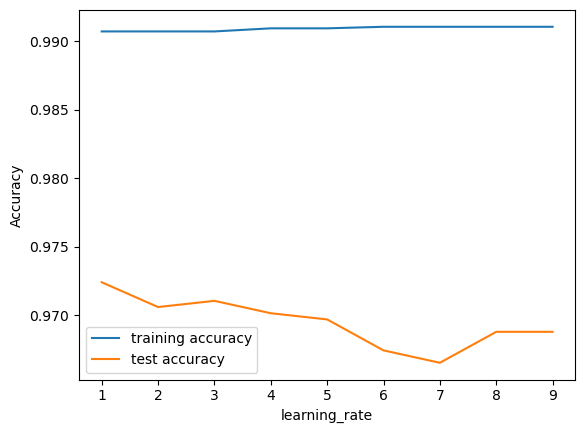

In [57]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [58]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [64]:
# Assuming your y_train has values -1 and 1
y_train = (y_train + 1) // 2

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [86]:
# Accuracy
acc_train_xgb = metrics.accuracy_score(y_train, y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test, y_test_xgb)
print("XGBoost Classifier: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

# F1-score
f1_score_train_xgb = metrics.f1_score(y_train, y_train_xgb)  # or 'micro', 'macro', 'weighted'
f1_score_test_xgb = metrics.f1_score(y_test, y_test_xgb, average='micro')  # or 'micro', 'macro', 'weighted'
print("XGBoost Classifier: F1-score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier: F1-score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

# Recall
recall_score_train_xgb = metrics.recall_score(y_train, y_train_xgb)  # or 'micro', 'macro', 'weighted'
recall_score_test_xgb = metrics.recall_score(y_test, y_test_xgb, average='micro')  # or 'micro', 'macro', 'weighted'
print("XGBoost Classifier: Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier: Recall on test Data: {:.3f}".format(recall_score_test_xgb))
print()

# Precision
precision_score_train_xgb = metrics.precision_score(y_train, y_train_xgb )  # or 'micro', 'macro', 'weighted'
precision_score_test_xgb = metrics.precision_score(y_test, y_test_xgb, average='micro')  # or 'micro', 'macro', 'weighted'
print("XGBoost Classifier: Precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier: Precision on test Data: {:.3f}".format(precision_score_test_xgb))


XGBoost Classifier: Accuracy on training Data: 0.987
XGBoost Classifier: Accuracy on test Data: 0.549

XGBoost Classifier: F1-score on training Data: 0.989
XGBoost Classifier: F1-score on test Data: 0.549

XGBoost Classifier: Recall on training Data: 0.993
XGBoost Classifier: Recall on test Data: 0.549

XGBoost Classifier: Precision on training Data: 0.984
XGBoost Classifier: Precision on test Data: 0.549


In [87]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [88]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [89]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [93]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp, average='micro')
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.985
Multi-layer Perceptron : Accuracy on test Data: 0.544

Multi-layer Perceptron : f1_score on training Data: 0.986
Multi-layer Perceptron : f1_score on test Data: 0.986

Multi-layer Perceptron : Recall on training Data: 0.980
Multi-layer Perceptron : Recall on test Data: 0.544

Multi-layer Perceptron : precision on training Data: 0.993
Multi-layer Perceptron : precision on test Data: 0.544


In [94]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [95]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [96]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,Support Vector Machine,0.964,0.968,0.980,0.965
2,Naive Bayes Classifier,0.605,0.454,0.292,0.997
3,Decision Tree,0.957,0.962,0.991,0.993
4,Random Forest,0.968,0.971,0.993,0.990
5,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
6,CatBoost Classifier,0.972,0.975,0.994,0.989
7,XGBoost Classifier,0.549,0.549,0.993,0.984
8,Multi-layer Perceptron,0.544,0.544,0.980,0.993


In [97]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [98]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Random Forest,0.968,0.971,0.993,0.990
3,Support Vector Machine,0.964,0.968,0.980,0.965
4,Decision Tree,0.957,0.962,0.991,0.993
5,Logistic Regression,0.934,0.941,0.943,0.927
6,Naive Bayes Classifier,0.605,0.454,0.292,0.997
7,XGBoost Classifier,0.549,0.549,0.993,0.984
8,Multi-layer Perceptron,0.544,0.544,0.980,0.993


In [99]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [105]:
import pickle
filename = 'model.pkl'
pickle.dump(gbc, open(filename,'wb'))

In [106]:
load_model=pickle.load(open(filename, 'rb'))

In [107]:
load_model

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)